In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_json('/scratch1/redditqa/data/ask_historians/AskHistorians.jsonl', lines=True, orient='records')

In [7]:
df.head()

,question_created_utc,question_retrieved_on,question_deleted,question_title,question_selftext,question_score,question_char_length,question_selftext_char_length,answers
0,1672513331000,1673167877000,False,Native American Book Recommendations?,Hi! I'm on the hunt for more book recommendati...,38,37,1175,"[{'answer_id': 'j2fdktj', 'answer_created_utc'..."
1,1347846326000,1413569904000,False,"What counted as ""science"" in the Greek Academy...",,6,60,0,"[{'answer_id': 'c6998pv', 'answer_created_utc'..."
2,1672513458000,1673167876000,False,What is the most visually accurate depiction o...,,1,54,0,"[{'answer_id': 'j2etbdl', 'answer_created_utc'..."
3,1347846624000,1413569895000,False,There is a scene in the movie 'Gladiator' whic...,I'm aware the film is far from historically ac...,37,192,157,"[{'answer_id': 'c69eal6', 'answer_created_utc'..."
4,1672517086000,1673167832000,False,Were Roman curse tablets mass produced? If so ...,I saw a meme saying there was evidence that Ro...,9,50,227,"[{'answer_id': 'j2fbm7v', 'answer_created_utc'..."


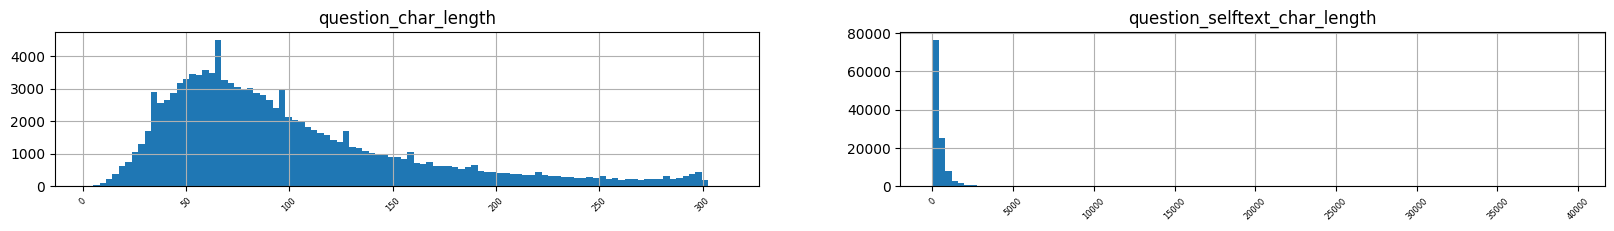

In [8]:
figsize=(20, 2)
fig, axes = plt.subplots(nrows=1, ncols=2)

for i, colname in enumerate(['question_char_length', 'question_selftext_char_length']):
    axes[i].set_title(colname)
    df[colname].hist(ax=axes[i], bins=100, xrot=45, figsize=figsize, xlabelsize=6)

In [11]:
# Unnest the answers
df_unnested = df.explode('answers')
df_unnested = pd.concat([
    df_unnested['answers'].apply(pd.Series),
    df_unnested.drop(columns=['answers'])], axis=1)
df_unnested.head()

,answer_id,answer_created_utc,answer_retrieved_on,answer_deleted,answer_body,answer_score,answer_char_length,question_created_utc,question_retrieved_on,question_deleted,question_title,question_selftext,question_score,question_char_length,question_selftext_char_length
0,j2fdktj,1672522188000,1673022200000,False,I'm going to recommend some of my favorites be...,7,3014,1672513331000,1673167877000,False,Native American Book Recommendations?,Hi! I'm on the hunt for more book recommendati...,38,37,1175
0,j2et07l,1672513332000,1673022760000,False,Welcome to /r/AskHistorians. **Please [Read Ou...,1,1774,1672513331000,1673167877000,False,Native American Book Recommendations?,Hi! I'm on the hunt for more book recommendati...,38,37,1175
1,c6998pv,1347854573000,1429917825000,False,Greek science can be better described as natur...,3,675,1347846326000,1413569904000,False,"What counted as ""science"" in the Greek Academy...",,6,60,0
1,c699oqe,1347856387000,1429918037000,False,"Firstly, it's AD 500. Pet peeve.\n\nSecondly,...",3,586,1347846326000,1413569904000,False,"What counted as ""science"" in the Greek Academy...",,6,60,0
1,c69px53,1347936114000,1429925821000,False,"Would like to answer, but first I wanted to as...",1,216,1347846326000,1413569904000,False,"What counted as ""science"" in the Greek Academy...",,6,60,0
